## Breast Cancer Machine Learning Techniques
Machine Learning with Wisconsin breast cancer data set. 

+ Raul Eulogio

## Abstract
For this quick project, I wanted to implement a few **Machine Learning** techniques on a data set containing descriptive attributes of a digitized image of a fine needle aspirate (FNA) of breast mass. We have a total of 10 features that were computed for each cell nucleus with an ID Number and the Diagnosis (M = **Malignant**, B = **Benign**). 

This is popular data set used for machine learning purposes, and I plan on using the same techniques I used for another data set that performed poorly due to havin too many *Categorical* variables.

Thus for this project I decided to use 4 statistical models which I thought would do significantly better than others. The ones I have chosen are listed here (although I will go into more detail about each model in later sections):

+ Kth Nearest Neighbor
+ Decision Trees
+ (Bagging) Random Forest
+ Neural Networks

I employ critical data analysis modules in this project more specifically 

+ pandas
+ scikit learn 
+ matplotlib (for visuals)

## 1. Load Modules
We load our modules into our python environment. In my case I am employing a **Jupyter Notebook** while running inside an **Anaconda** environment. 

For now to illustrate and show the module versions in a simple way I will name the ones I used and show the version I used as follows:

+ numpy==1.11.2
+ pandas==0.18.1
+ matplotlib==1.5.3
+ sklearn==0.18.1
+ seaborn==0.7.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Visuals
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer # Transform categorical variables
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier # Bagging Forest
from sklearn.neural_network import MLPClassifier # Neural Networks
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # AUC 
from urllib.request import urlopen
from ggplot import *

plt.style.use('ggplot') # Using ggplot2 style visuals because that's how I learned my visuals and I'm sticking to it!

## 2. Get Data 
Data set from `UCI Database`. I decided to use this data set because it was a real world application of machine learning. Looking through the data set you can see certain attributes like area, smoothness, and symmetry of the nucleus among other physical attributes. 

Our goal is to try to find the best method which will predict where the specimen has **Breast Cancer** or not based on certain physical characteristics. 

Our goal is to make these assumption with strong statistical evidence to back our claims and see what attributes helped us the most. Thus with machine learning, and statistical learning (data science, data mining, classification etc) we are trying to find statistical patterns that would lead us to predict to help our understanding of the data around us. 

In [2]:
UCI_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

names = ['id_number', 'clumpThickness', 'cellSize', 'cellShape', 'marginalAdh',
        'epithCSize', 'bareNuclei', 'blandCromatin', 'normNucleoli', 'mitoses', 'class'] 

breastCancer = pd.read_csv(urlopen(UCI_data_URL), names=names)

breastCancer.set_index(['id_number'], inplace = True)
breastCancer.head()

,clumpThickness,cellSize,cellShape,marginalAdh,epithCSize,bareNuclei,blandCromatin,normNucleoli,mitoses,class
id_number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
print("Here's the dimensions of our data frame:")
print(breastCancer.shape)
print("Here's the data types of our columns:")
print(breastCancer.dtypes)

Here's the dimensions of our data frame:
(699, 10)
Here's the data types of our columns:
clumpThickness     int64
cellSize           int64
cellShape          int64
marginalAdh        int64
epithCSize         int64
bareNuclei        object
blandCromatin      int64
normNucleoli       int64
mitoses            int64
class              int64
dtype: object


### Normalizing Data 
A step known as preprocessing, for many machine learning techniques scaling the data to be of `mean` 0 and `variance` of 1. Put more explanation here... but don't want to cus I want to run models and shit.

Bare Nuclei has some **?** so it was interpretted as an **Object** data type so we will convert to **Float**, then drop the **NaN's** produced

In [4]:
breastCancer['bareNuclei'] = breastCancer['bareNuclei'].apply(pd.to_numeric, errors = 'coerce')

In [5]:
breastCancer.dtypes

clumpThickness      int64
cellSize            int64
cellShape           int64
marginalAdh         int64
epithCSize          int64
bareNuclei        float64
blandCromatin       int64
normNucleoli        int64
mitoses             int64
class               int64
dtype: object

In [6]:
breastCancerTest = breastCancer.iloc[:, 0:9]

for item in breastCancer:
    if item in breastCancerTest:
        breastCancer_norm = (breastCancerTest - breastCancerTest.min()) / (breastCancerTest.max() - breastCancerTest.min())
print(breastCancer_norm.head())

           clumpThickness  cellSize  cellShape  marginalAdh  epithCSize  \
id_number                                                                 
1000025          0.444444  0.000000   0.000000     0.000000    0.111111   
1002945          0.444444  0.333333   0.333333     0.444444    0.666667   
1015425          0.222222  0.000000   0.000000     0.000000    0.111111   
1016277          0.555556  0.777778   0.777778     0.000000    0.222222   
1017023          0.333333  0.000000   0.000000     0.222222    0.111111   

           bareNuclei  blandCromatin  normNucleoli  mitoses  
id_number                                                    
1000025      0.000000       0.222222      0.000000      0.0  
1002945      1.000000       0.222222      0.111111      0.0  
1015425      0.111111       0.222222      0.000000      0.0  
1016277      0.333333       0.222222      0.666667      0.0  
1017023      0.000000       0.222222      0.000000      0.0  


In [7]:
df = breastCancer.drop(breastCancerTest, axis=1)

breastCancer = pd.concat([breastCancer_norm, df], axis=1)

print(breastCancer.shape)
print(breastCancer.head())

(699, 10)
           clumpThickness  cellSize  cellShape  marginalAdh  epithCSize  \
id_number                                                                 
1000025          0.444444  0.000000   0.000000     0.000000    0.111111   
1002945          0.444444  0.333333   0.333333     0.444444    0.666667   
1015425          0.222222  0.000000   0.000000     0.000000    0.111111   
1016277          0.555556  0.777778   0.777778     0.000000    0.222222   
1017023          0.333333  0.000000   0.000000     0.222222    0.111111   

           bareNuclei  blandCromatin  normNucleoli  mitoses  class  
id_number                                                           
1000025      0.000000       0.222222      0.000000      0.0      2  
1002945      1.000000       0.222222      0.111111      0.0      2  
1015425      0.111111       0.222222      0.000000      0.0      2  
1016277      0.333333       0.222222      0.666667      0.0      2  
1017023      0.000000       0.222222      0.000000

In [8]:
breastCancer = breastCancer.dropna(axis=0)

## Creating Training and Test Sets

In [9]:
train, test = train_test_split(breastCancer, test_size = 0.20, random_state = 42)

train_set = train.ix[:, train.columns != 'class']
class_set = train.ix[:, train.columns == 'class']

test_set = test.ix[:, test.columns != 'class']
test_class_set = test.ix[:, test.columns == 'class']

## Kth Nearest Neighbor

In [10]:
breastCancerKnn = KNeighborsClassifier()

In [11]:
breastCancerKnn.fit(train_set, class_set['class'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
predictionsTrain = breastCancerKnn.predict(train_set)

print(pd.crosstab(predictionsTrain, class_set['class']))

accuracyTrain = breastCancerKnn.score(train_set, class_set['class'])

print("Here is our accuracy for our training set:")
print('%.3f' % accuracyTrain)

class    2    4
row_0          
2      358    7
4        7  174
Here is our accuracy for our training set:
0.974


In [13]:
print("The train error rate for our model is:")
train_error_rate = 1 - accuracyTrain  
print('%.5f' % train_error_rate)

The train error rate for our model is:
0.02564


In [14]:
predictions = breastCancerKnn.predict(test_set)

print(pd.crosstab(predictions, test_class_set['class']))

accuracy = breastCancerKnn.score(test_set, test_class_set['class'])

print("Here is our accuracy for our training set:")
print('%.3f' % accuracy)

class   2   4
row_0        
2      78   6
4       1  52
Here is our accuracy for our training set:
0.949


In [15]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate = 1 - accuracy
print('%.5f' % test_error_rate)

The test error rate for our model is:
0.05109


## ROC Curves

**NOTE**: Need to learn how to convert `test_class_set` and **predictions** to **BINARY** to make **ROC Curves** WORK!!

**SOURCE**: (http://blog.yhat.com/posts/roc-curves.html)

In [16]:
test_class_np = np.array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [17]:
predictions
predictions_np = np.array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [18]:
fpr, tpr, _ = roc_curve(predictions_np, test_class_np)

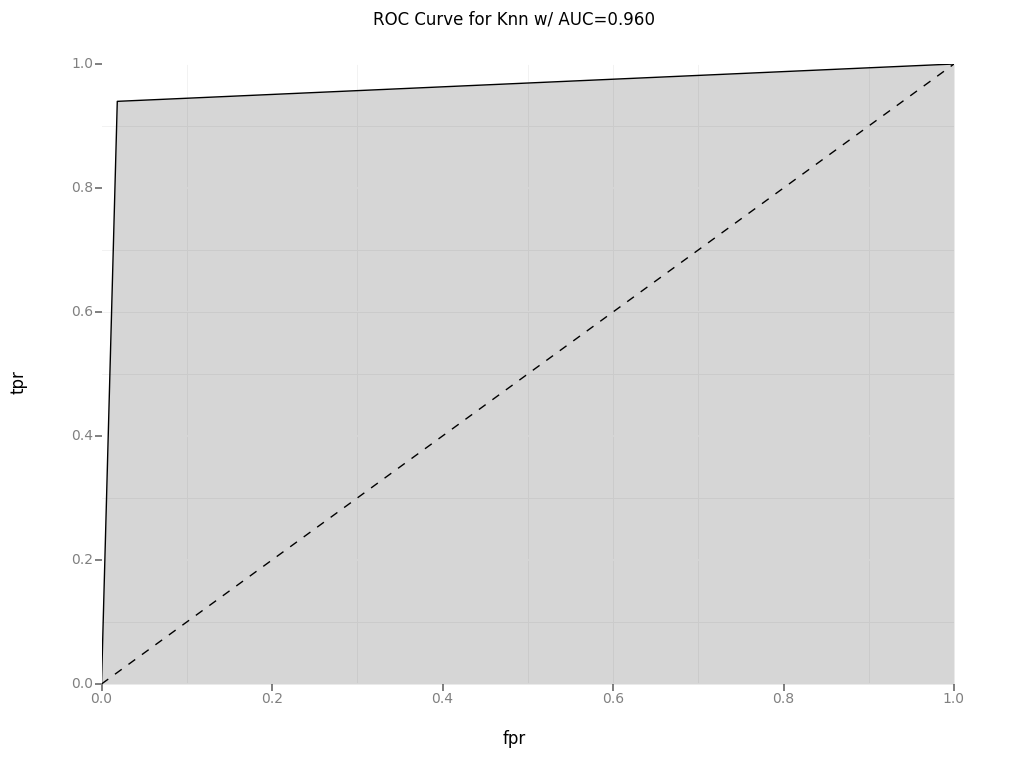

<ggplot: (-9223363250366235083)>

In [19]:
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
auc = auc(fpr, tpr)
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_area(alpha=0.2) +\
    geom_abline(linetype='dashed') +\
    theme_bw() +\
    ggtitle('ROC Curve for Knn w/ AUC=%.5s' % str(auc))

## Decision Trees

In [20]:
dt = DecisionTreeClassifier(random_state = 42)
fit = dt.fit(train_set, class_set)

In [17]:
with open('breastCancer.dot', 'w') as f:
    f = export_graphviz(fit, out_file = f)

**SOURCE**: (https://github.com/dreampuf/GraphvizOnline)

<img src='dt.png'>

In [21]:
importances = fit.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([1, 5, 7, 0, 4, 3, 6, 2, 8])

In [22]:
namesInd = names[1:10]

# Print the feature ranking
print("Feature ranking:")

for f in range(9):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, namesInd[indices[i]], importances[indices[f]]))

Feature ranking:
1. The feature 'cellSize' has a Gini Importance of 0.758844
2. The feature 'bareNuclei' has a Gini Importance of 0.091709
3. The feature 'normNucleoli' has a Gini Importance of 0.046831
4. The feature 'clumpThickness' has a Gini Importance of 0.030305
5. The feature 'epithCSize' has a Gini Importance of 0.024125
6. The feature 'marginalAdh' has a Gini Importance of 0.021033
7. The feature 'blandCromatin' has a Gini Importance of 0.013508
8. The feature 'cellShape' has a Gini Importance of 0.007447
9. The feature 'mitoses' has a Gini Importance of 0.006198


In [23]:
accuracy_dt = fit.score(test_set, test_class_set['class'])

print("Here is our mean accuracy on the test set:")
print('%.2f' % accuracy_dt)

Here is our mean accuracy on the test set:
0.93


In [24]:
predictions_dt = fit.predict(test_set)

print("Table comparing actual vs. predicted values for our test set:")
print(pd.crosstab(predictions_dt, test_class_set['class']))

Table comparing actual vs. predicted values for our test set:
class   2   4
row_0        
2      77   7
4       2  51


In [25]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate_dt = 1 - accuracy_dt
print('%.5f' % test_error_rate_dt)

The test error rate for our model is:
0.06569


## ROC Curve for Decision Trees
Same issue as before!

In [26]:
predictions_dt_np = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])
print(predictions_dt_np)

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1]


In [27]:
fpr1, tpr1, _ = roc_curve(predictions_dt_np, test_class_np)

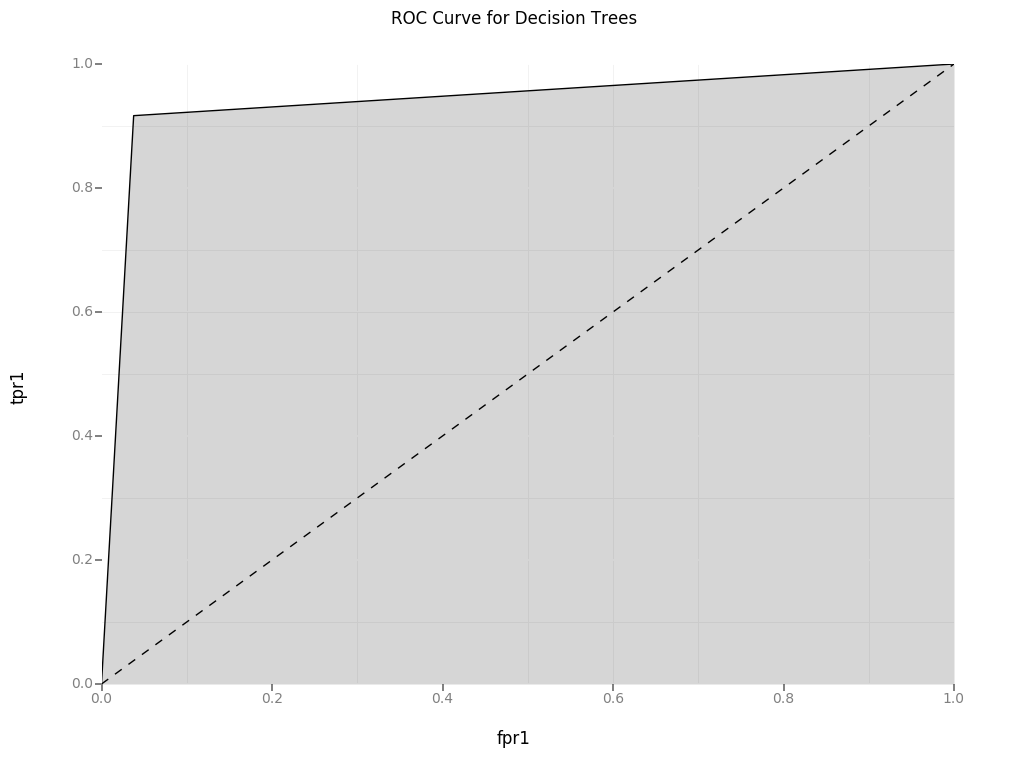

<ggplot: (8786432745827)>

In [29]:
df1 = pd.DataFrame(dict(fpr1=fpr1, tpr1=tpr1))

ggplot(df1, aes(x='fpr1', y='tpr1')) +\
    geom_line() +\
    geom_area(alpha=0.2) +\
    geom_abline(linetype='dashed') +\
    theme_bw() +\
    ggtitle('ROC Curve for Decision Trees')

## Random Forest

In [30]:
fit_RF = RandomForestClassifier(n_estimators = 128)
fit_RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
fit_RF.fit(train_set, class_set['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
predictions_RF = fit_RF.predict(test_set)

In [33]:
print(pd.crosstab(predictions_RF, test_class_set['class']))

class   2   4
row_0        
2      78   4
4       1  54


In [34]:
accuracy_RF = fit_RF.score(test_set, test_class_set['class'])
print('%.5f' % accuracy_RF)

0.96350


In [35]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate_RF = 1 - accuracy_RF
print('%.5f' % test_error_rate_RF)

The test error rate for our model is:
0.03650


## ROC Curve for Random Forest 
Same issues as before

In [36]:
predictions_RF_np = np.array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])
predictions_RF_np

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [37]:
fpr2, tpr2, _ = roc_curve(predictions_RF_np, test_class_np)

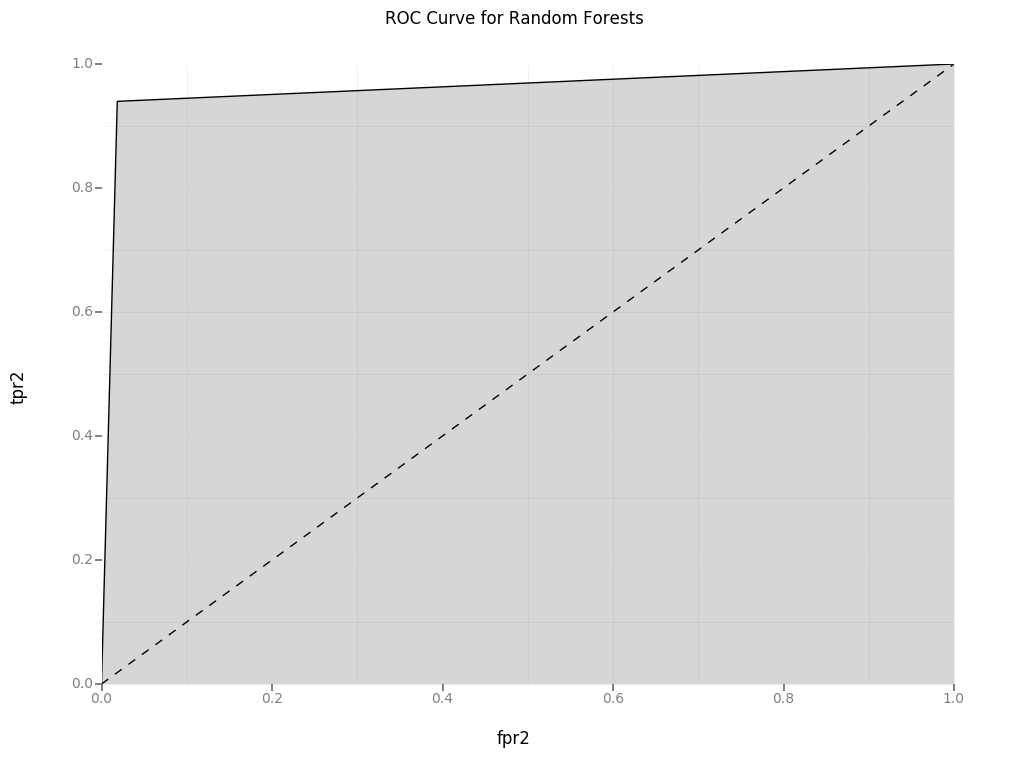

<ggplot: (-9223363250422014148)>

In [38]:
df2 = pd.DataFrame(dict(fpr2=fpr2, tpr2=tpr2))

ggplot(df2, aes(x='fpr2', y='tpr2')) +\
    geom_line() +\
    geom_area(alpha=0.2) +\
    geom_abline(linetype='dashed') +\
    theme_bw() +\
    ggtitle('ROC Curve for Random Forests')

## Neural Networks

In [39]:
fit_NN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, ), random_state=7)

In [40]:
fit_NN.fit(train_set, class_set['class'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [41]:
predictions_NN = fit_NN.predict(test_set)
predictions_NN

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4,
       2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2])

In [42]:
print(pd.crosstab(predictions_NN, test_class_set['class']))

class   2   4
row_0        
2      78   4
4       1  54


In [43]:
accuracy_NN = fit_NN.score(test_set, test_class_set['class'])
print('%.2f' % accuracy_NN)

0.96


In [44]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate_NN = 1 - accuracy_NN
print('%.9f' % test_error_rate_NN)

The test error rate for our model is:
0.036496350


## ROC Curve for Neural Network

In [45]:
predictions_NN_np = np.array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [46]:
fpr3, tpr3, _ = roc_curve(predictions_NN_np, test_class_np)

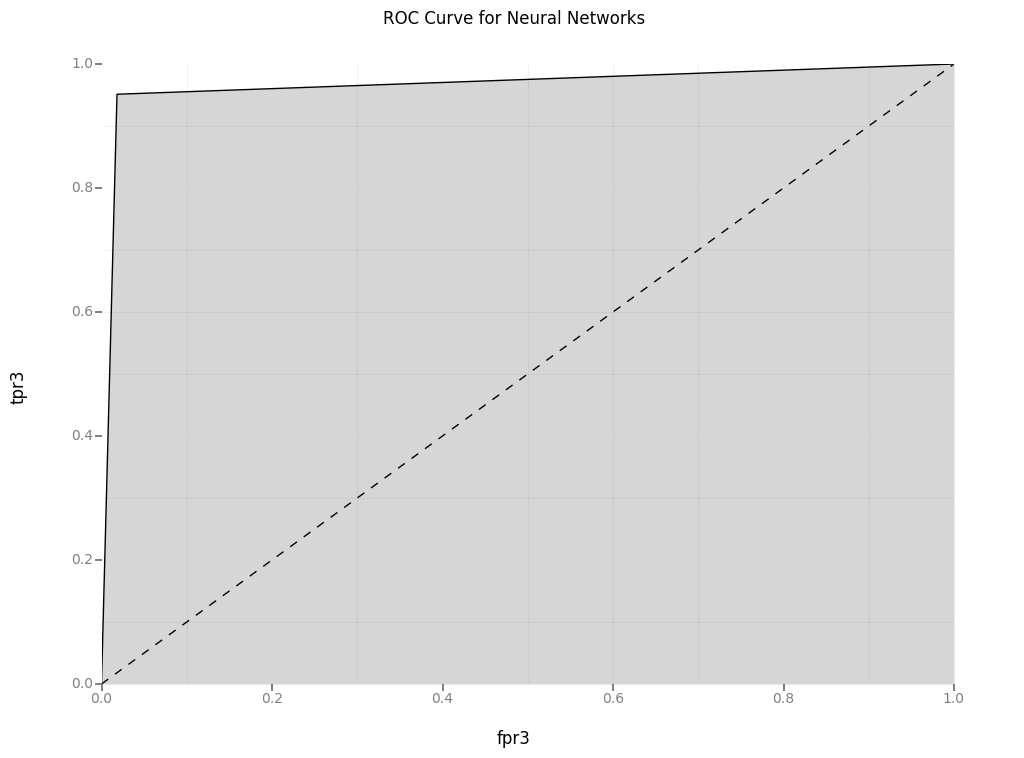

<ggplot: (-9223363250424454158)>

In [48]:
df3 = pd.DataFrame(dict(fpr3=fpr3, tpr3=tpr3))

ggplot(df3, aes(x='fpr3', y='tpr3')) +\
    geom_line() +\
    geom_area(alpha=0.2) +\
    geom_abline(linetype='dashed') +\
    theme_bw() +\
    ggtitle('ROC Curve for Neural Networks')